## Figure 4  

This manuscript generates figure 3 and relavent data of the paper. 

Kexin Dong

May 24, 2024  

In [92]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
import scipy.stats
from matplotlib.ticker import FixedLocator, FuncFormatter
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

## 4b 

Relationship of MHC-I binding rank percentages between human-mouse mutational pairs, which is modeled by H2M from mutation-derived and experiment-validated human tumor neoantigens.

In [113]:
def dict_score_class(h,m):
    if h <= 2 and m <=2:
        if h <= .5 and m<= .5:
            return 'strong'
        else:
            return 'both'
    elif m>2:
        if h<=2:
            return 'honly'
        else:
            return 'neither'
    else:
        return 'monly'
    
dict_color_class = {
    'strong':'darkred',
    'both':'tab:purple',
    'honly':'tab:orange',
    'monly':'tab:blue',
    'neither':'grey'
}

In [220]:
l_final = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/neoantigen/final_result/h2m_neoantigen_result_v3.csv')

In [221]:
l_final = l_final.sort_values(by='percentile_rank_m').reset_index(drop=True)

In [222]:
l_final['class'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_m'])]
l_final['color'] = [dict_color_class[x] for x in l_final['class']]

In [223]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)

Spearman correlation coefficient: 0.3628175215040141
P-value of the correlation: 2.327889424363825e-13


In [224]:
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Pearson correlation coefficient: 0.10517925080820222
P-value of the correlation: 0.03964967376587036


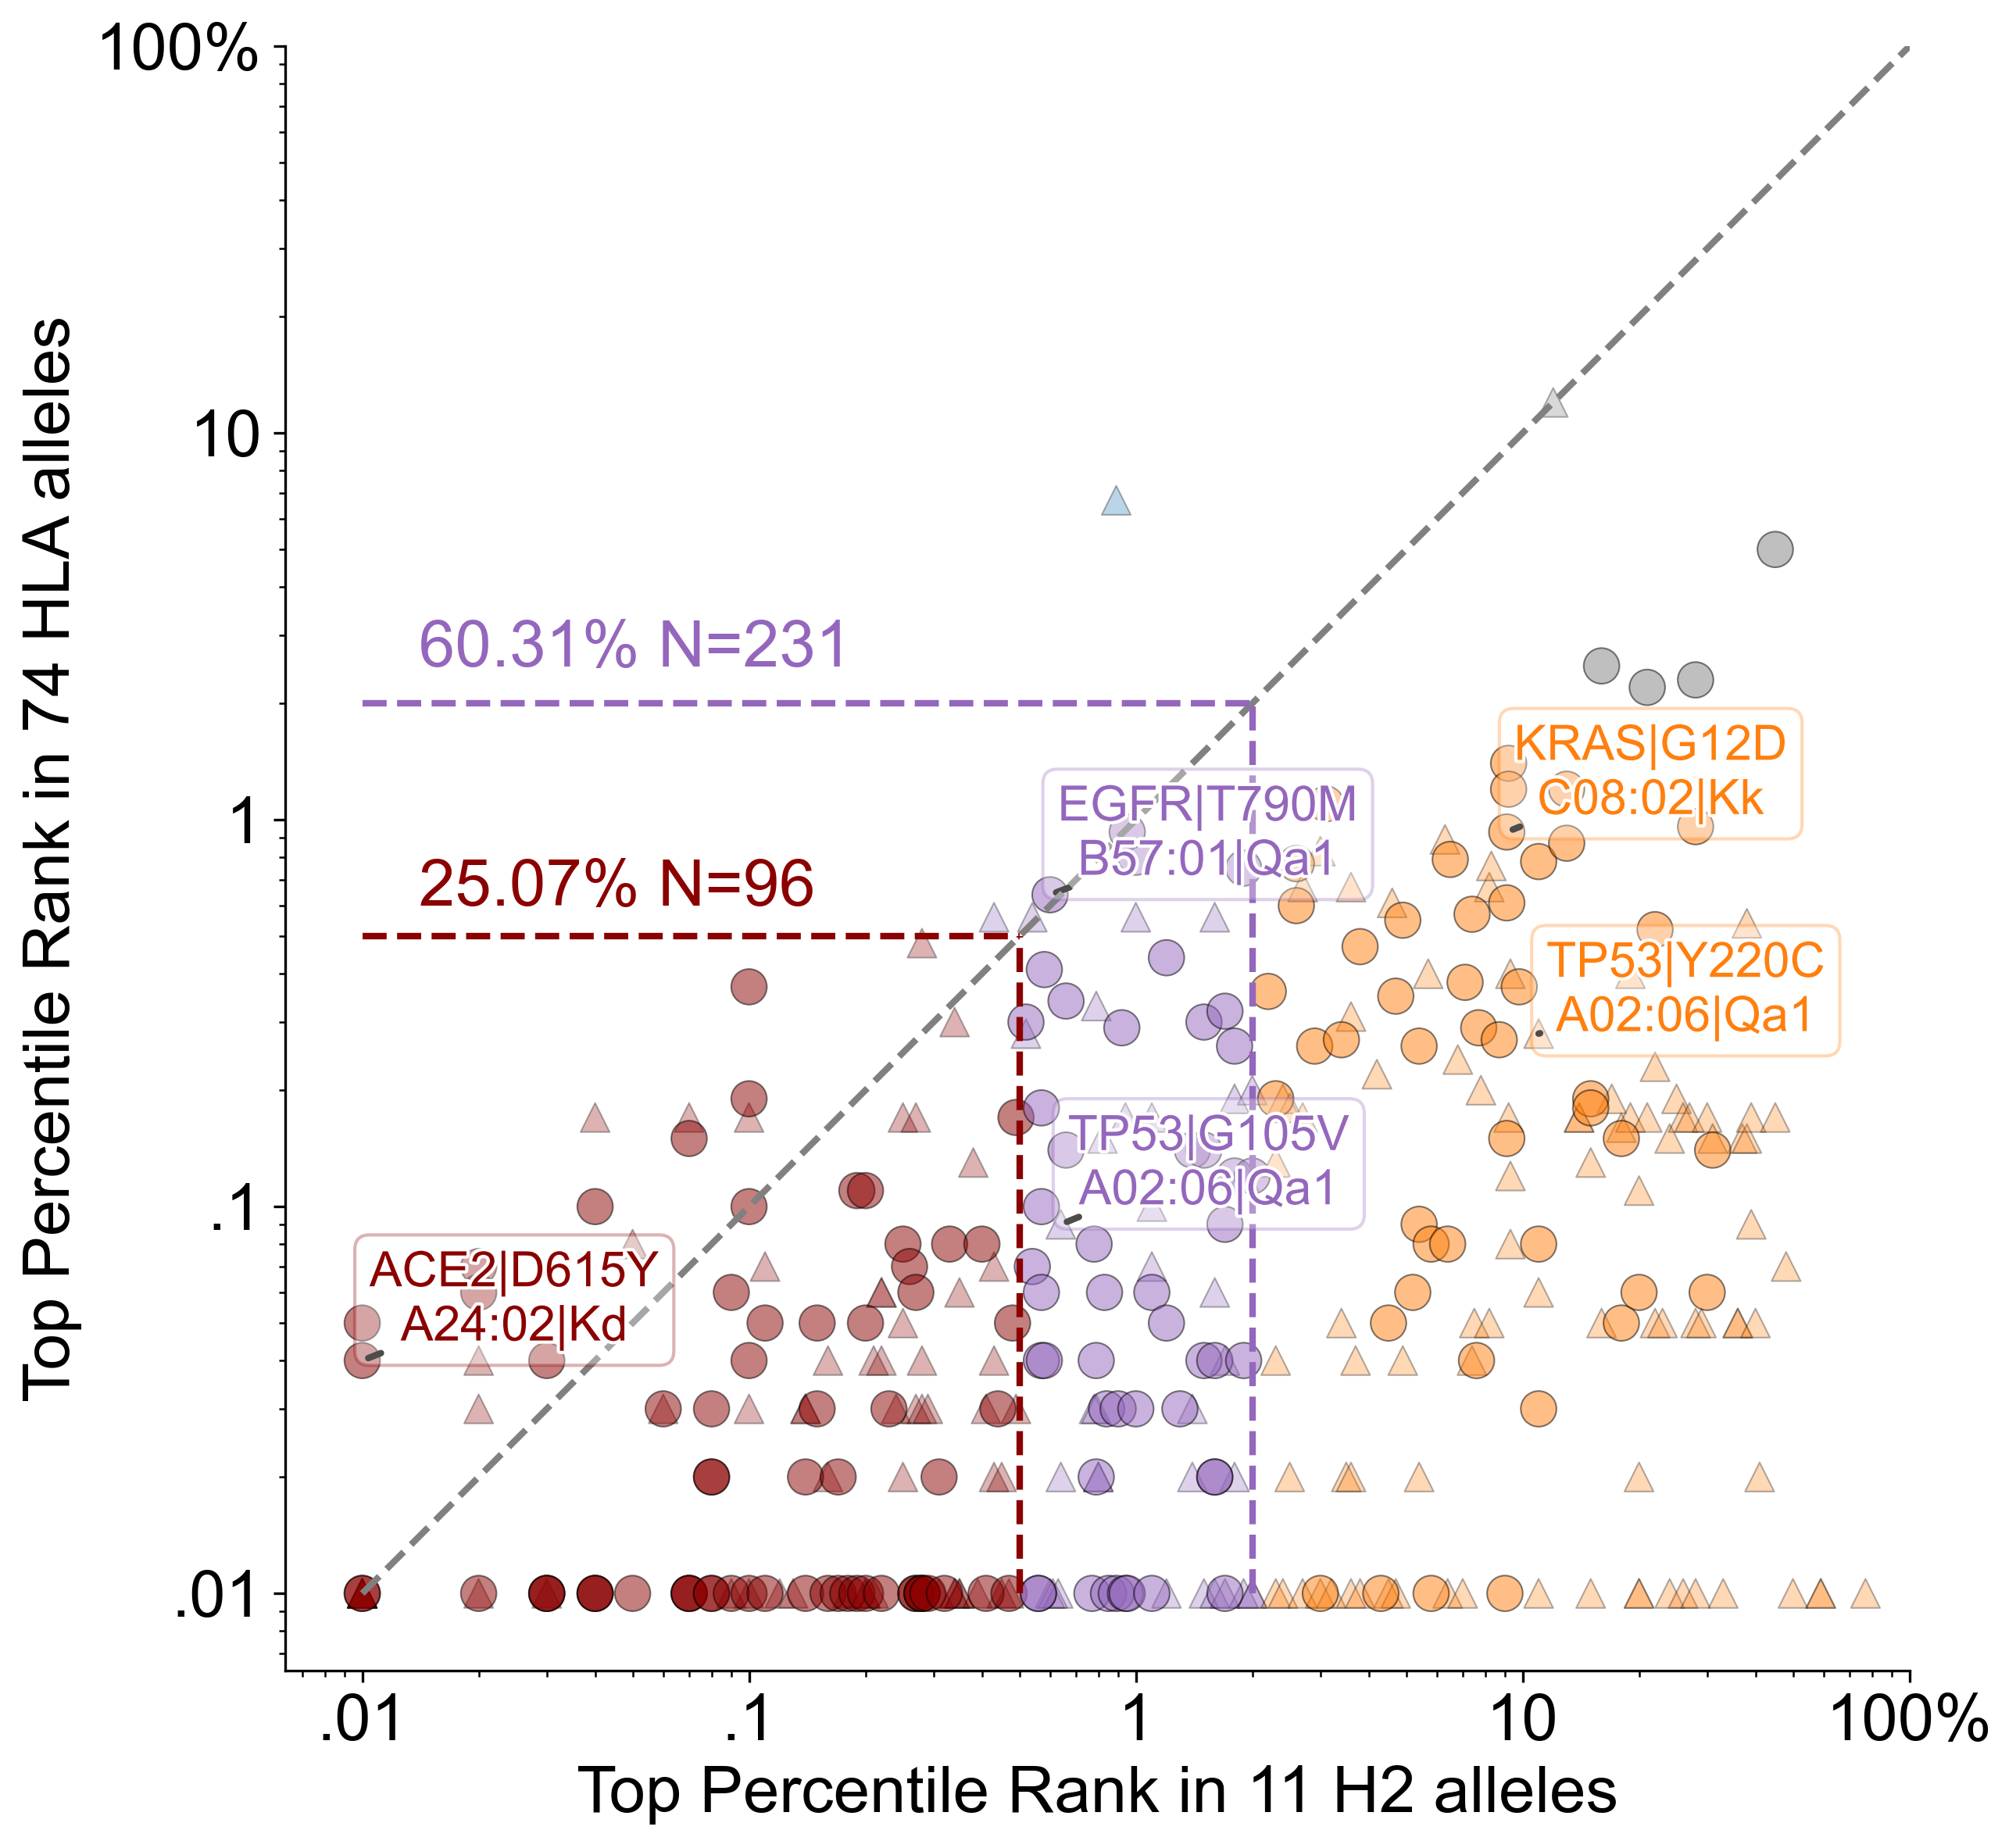

In [225]:
l_plot = l_final
# bbb1 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_m'],l_plot['percentile_rank_h'])]].iloc[:3,:]
# bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:3,:]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bbb1 = l_plot[l_plot['gene_name_h'].isin(['TP53','KRAS','ACE2','EGFR']) & l_plot['HGVSp_h'].isin(['D615Y','G105V','T790M','G12D','Y220C'])]
bb2 = bbb1.drop_duplicates(subset = 'HGVSp_h')

x = list(bb2['percentile_rank_m'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}|{q}' for x,y,p,q in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['HLA_allele'], bb2['H2_allele'])]
c = list(bb2['color'])


fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in 11 H2 alleles", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class']=='both') | (l_plot['class']=='strong')])
l_3 = len(l_plot[(l_plot['class']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
                bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3))
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=20, color=cc[i])
         for i in range(len(xx))]


plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/neoantigen/best_h2m.pdf',bbox_inches='tight')
plt.show()

In [226]:
len(plot_1)

174

In [227]:
len(plot_2)

209

## Supp Figure 4b

In [228]:
l_final['class_kb'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_kbdb'])]
l_final['color_kb'] = [dict_color_class[x] for x in l_final['class_kb']]

In [229]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Spearman correlation coefficient: 0.17449410132443133
P-value of the correlation: 0.0006033445062505406
Pearson correlation coefficient: 0.1226149120560431
P-value of the correlation: 0.016357336000987835


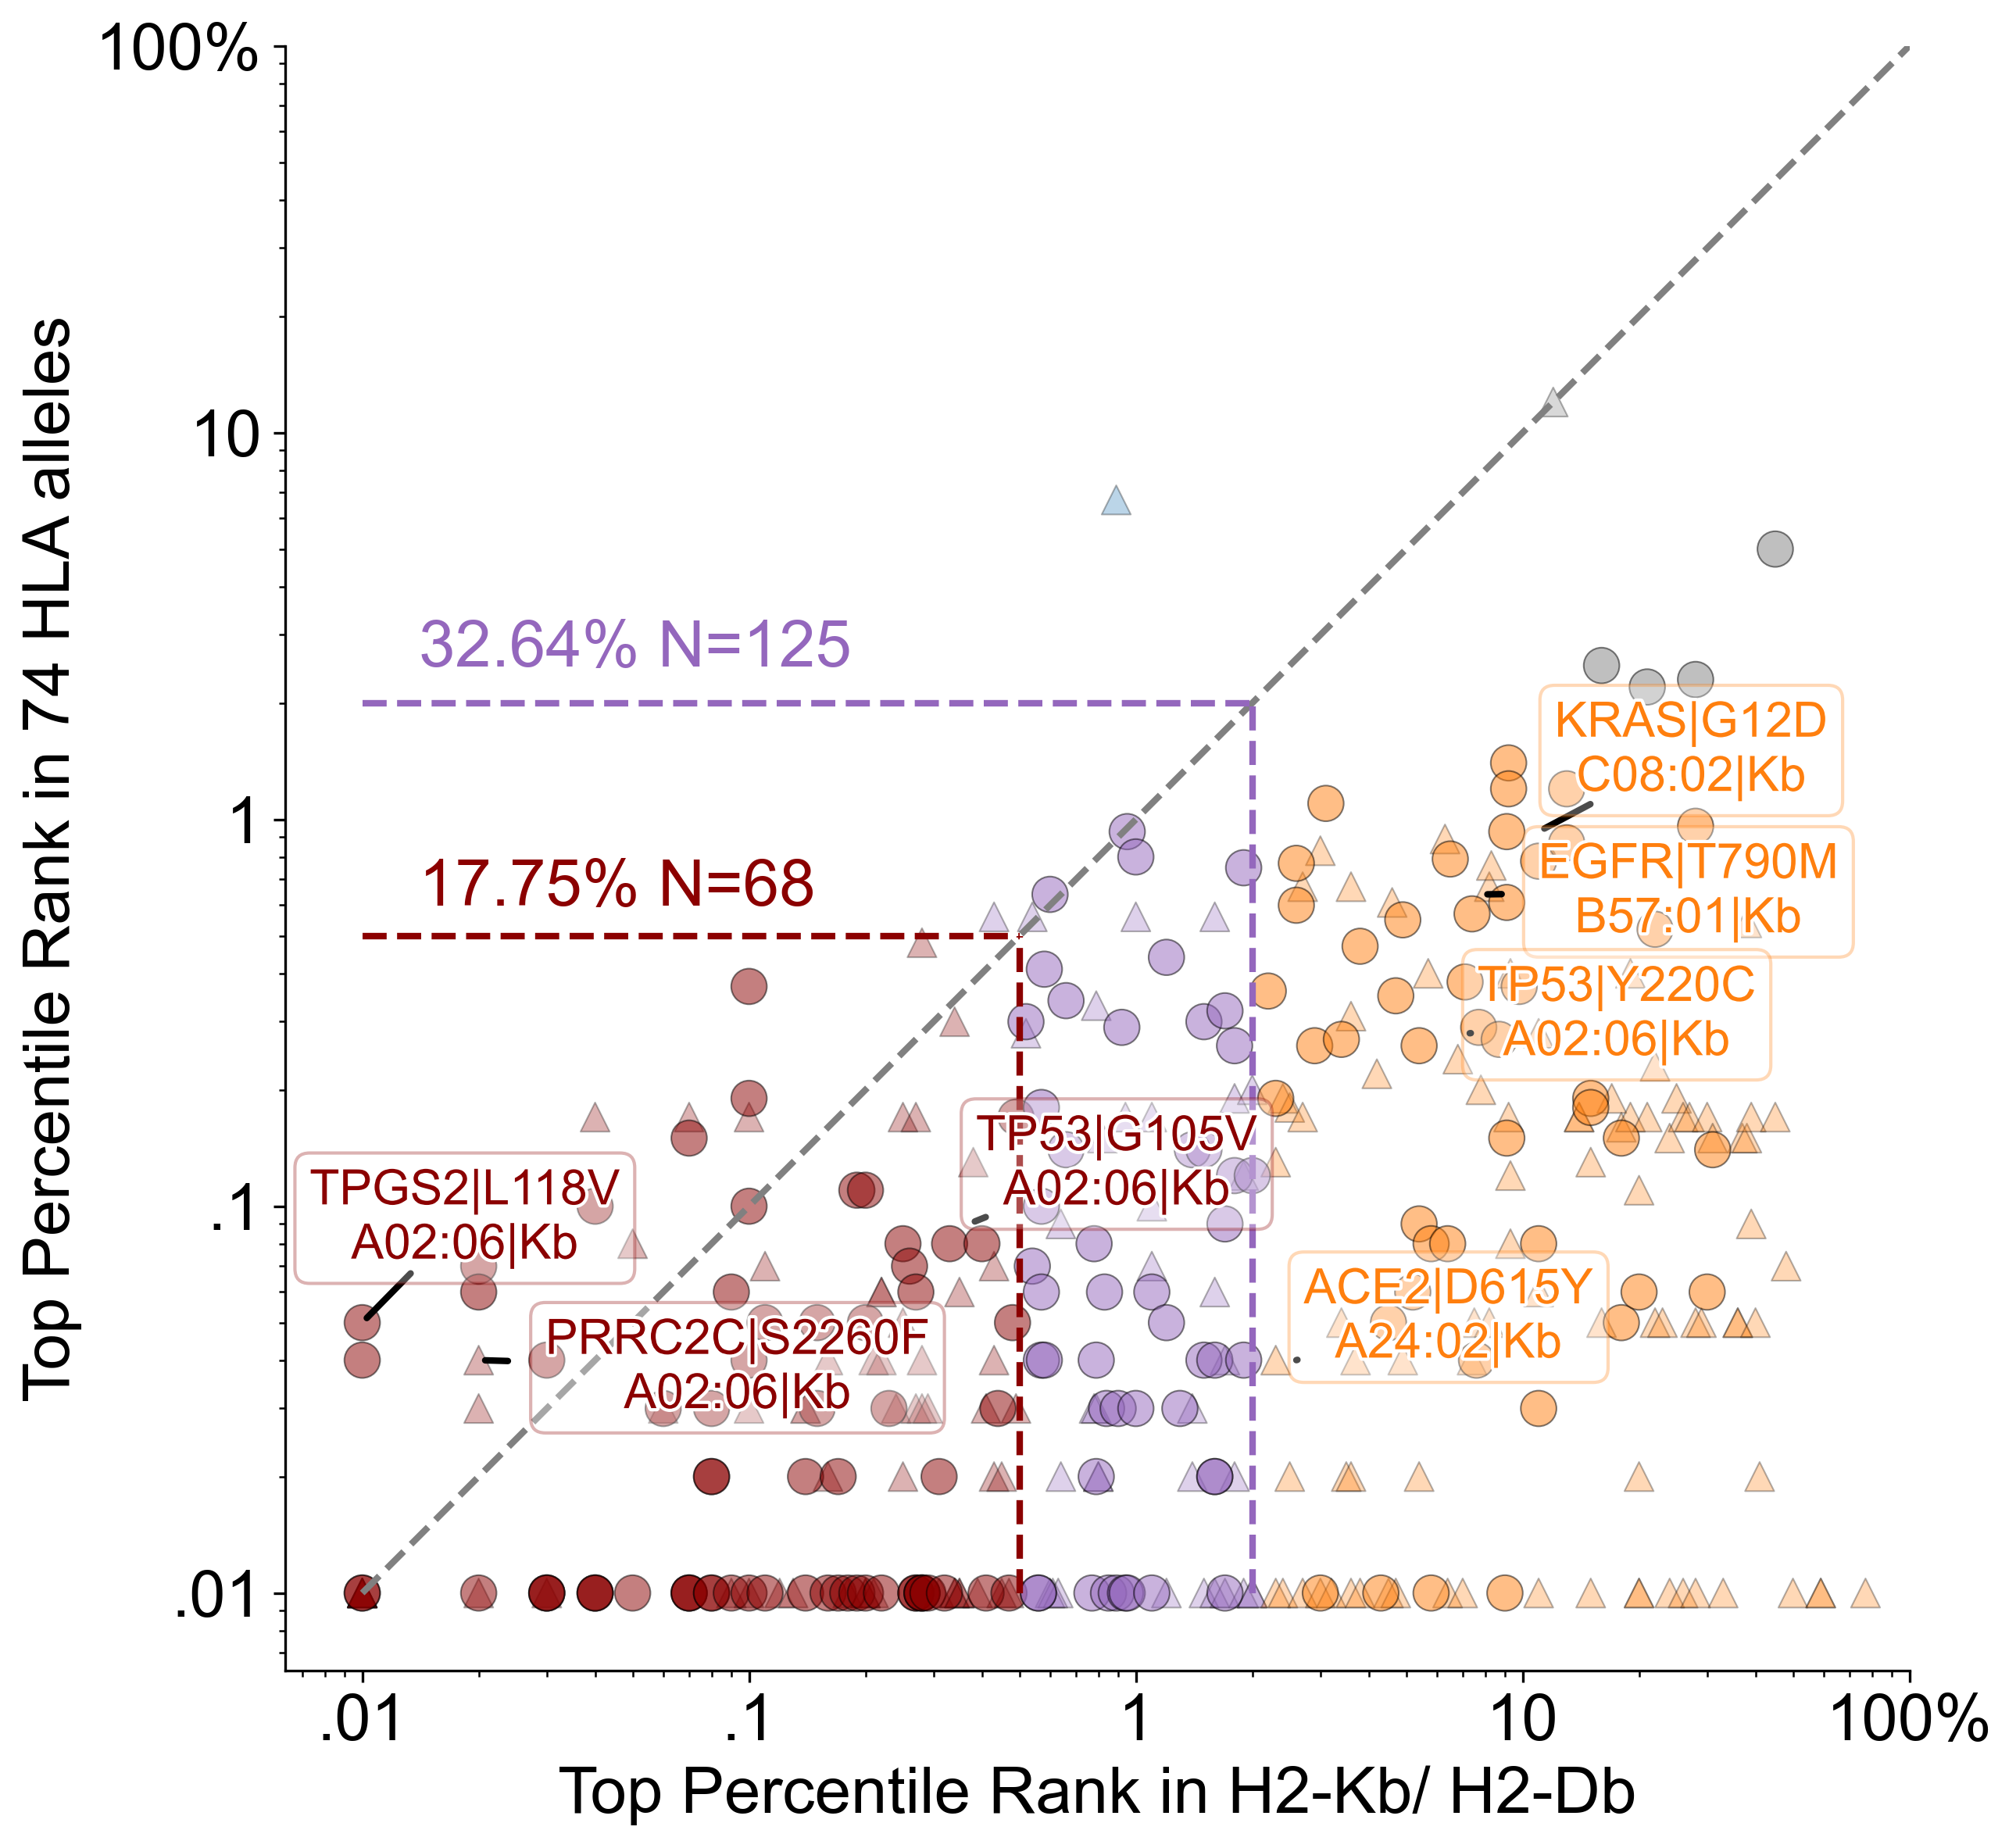

In [230]:
l_plot = l_final
bbb2 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_kbdb'],l_plot['percentile_rank_h'])]].iloc[:2,:]
# bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:3,:]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bbb1 = l_plot[l_plot['gene_name_h'].isin(['TP53','KRAS','ACE2','EGFR']) & l_plot['HGVSp_h'].isin(['D615Y','G105V','T790M','G12D','Y220C'])]
bb2 = pd.concat([bbb1,bbb2]).drop_duplicates(subset = 'HGVSp_h')

x = list(bb2['percentile_rank_kbdb'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}|{q}' for x,y,p,q in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['HLA_allele'], ['Kb']*len(bb2))]
c = list(bb2['color_kb'])


fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in H2-Kb/ H2-Db", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class_kb']=='both') | (l_plot['class_kb']=='strong')])
l_3 = len(l_plot[(l_plot['class_kb']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
                bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3))
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=20, color=cc[i])
         for i in range(len(xx))]

plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/neoantigen/kb_h2m.pdf',bbox_inches='tight')
plt.show()

In [231]:
len(plot_1)

174

In [232]:
len(plot_2)

209

## 4c  
Schematic of the generation of human-mouse peptide pairs from sequenced mutations of mouse tumor models, and the relationship of MHC-I binding %rank between them. Top %rank selection and binding thresholds are the same as b.  

In [153]:
def dict_score_class(h,m):
    if h <= 2 and m <=2:
        if h <= .5 and m<= .5:
            return 'strong'
        else:
            return 'both'
    elif m>2:
        if h<=2:
            return 'honly'
        else:
            return 'neither'
    else:
        return 'monly'
    
dict_color_class = {
    'strong':'darkred',
    'both':'tab:purple',
    'honly':'tab:orange',
    'monly':'tab:blue',
    'neither':'grey'
}

In [202]:
l_final = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/neoantigen/final_result/m2h_neoantigen_result_v3_.csv')

In [203]:
l_final['class'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_m'])]
l_final['color'] = [dict_color_class[x] for x in l_final['class']]

In [204]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)

Spearman correlation coefficient: 0.5880767165311821
P-value of the correlation: 0.0


In [205]:
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_m']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Pearson correlation coefficient: 0.6816854730245067
P-value of the correlation: 0.0


In [211]:
l_final = l_final.sort_values(by='percentile_rank_m').reset_index(drop=True)

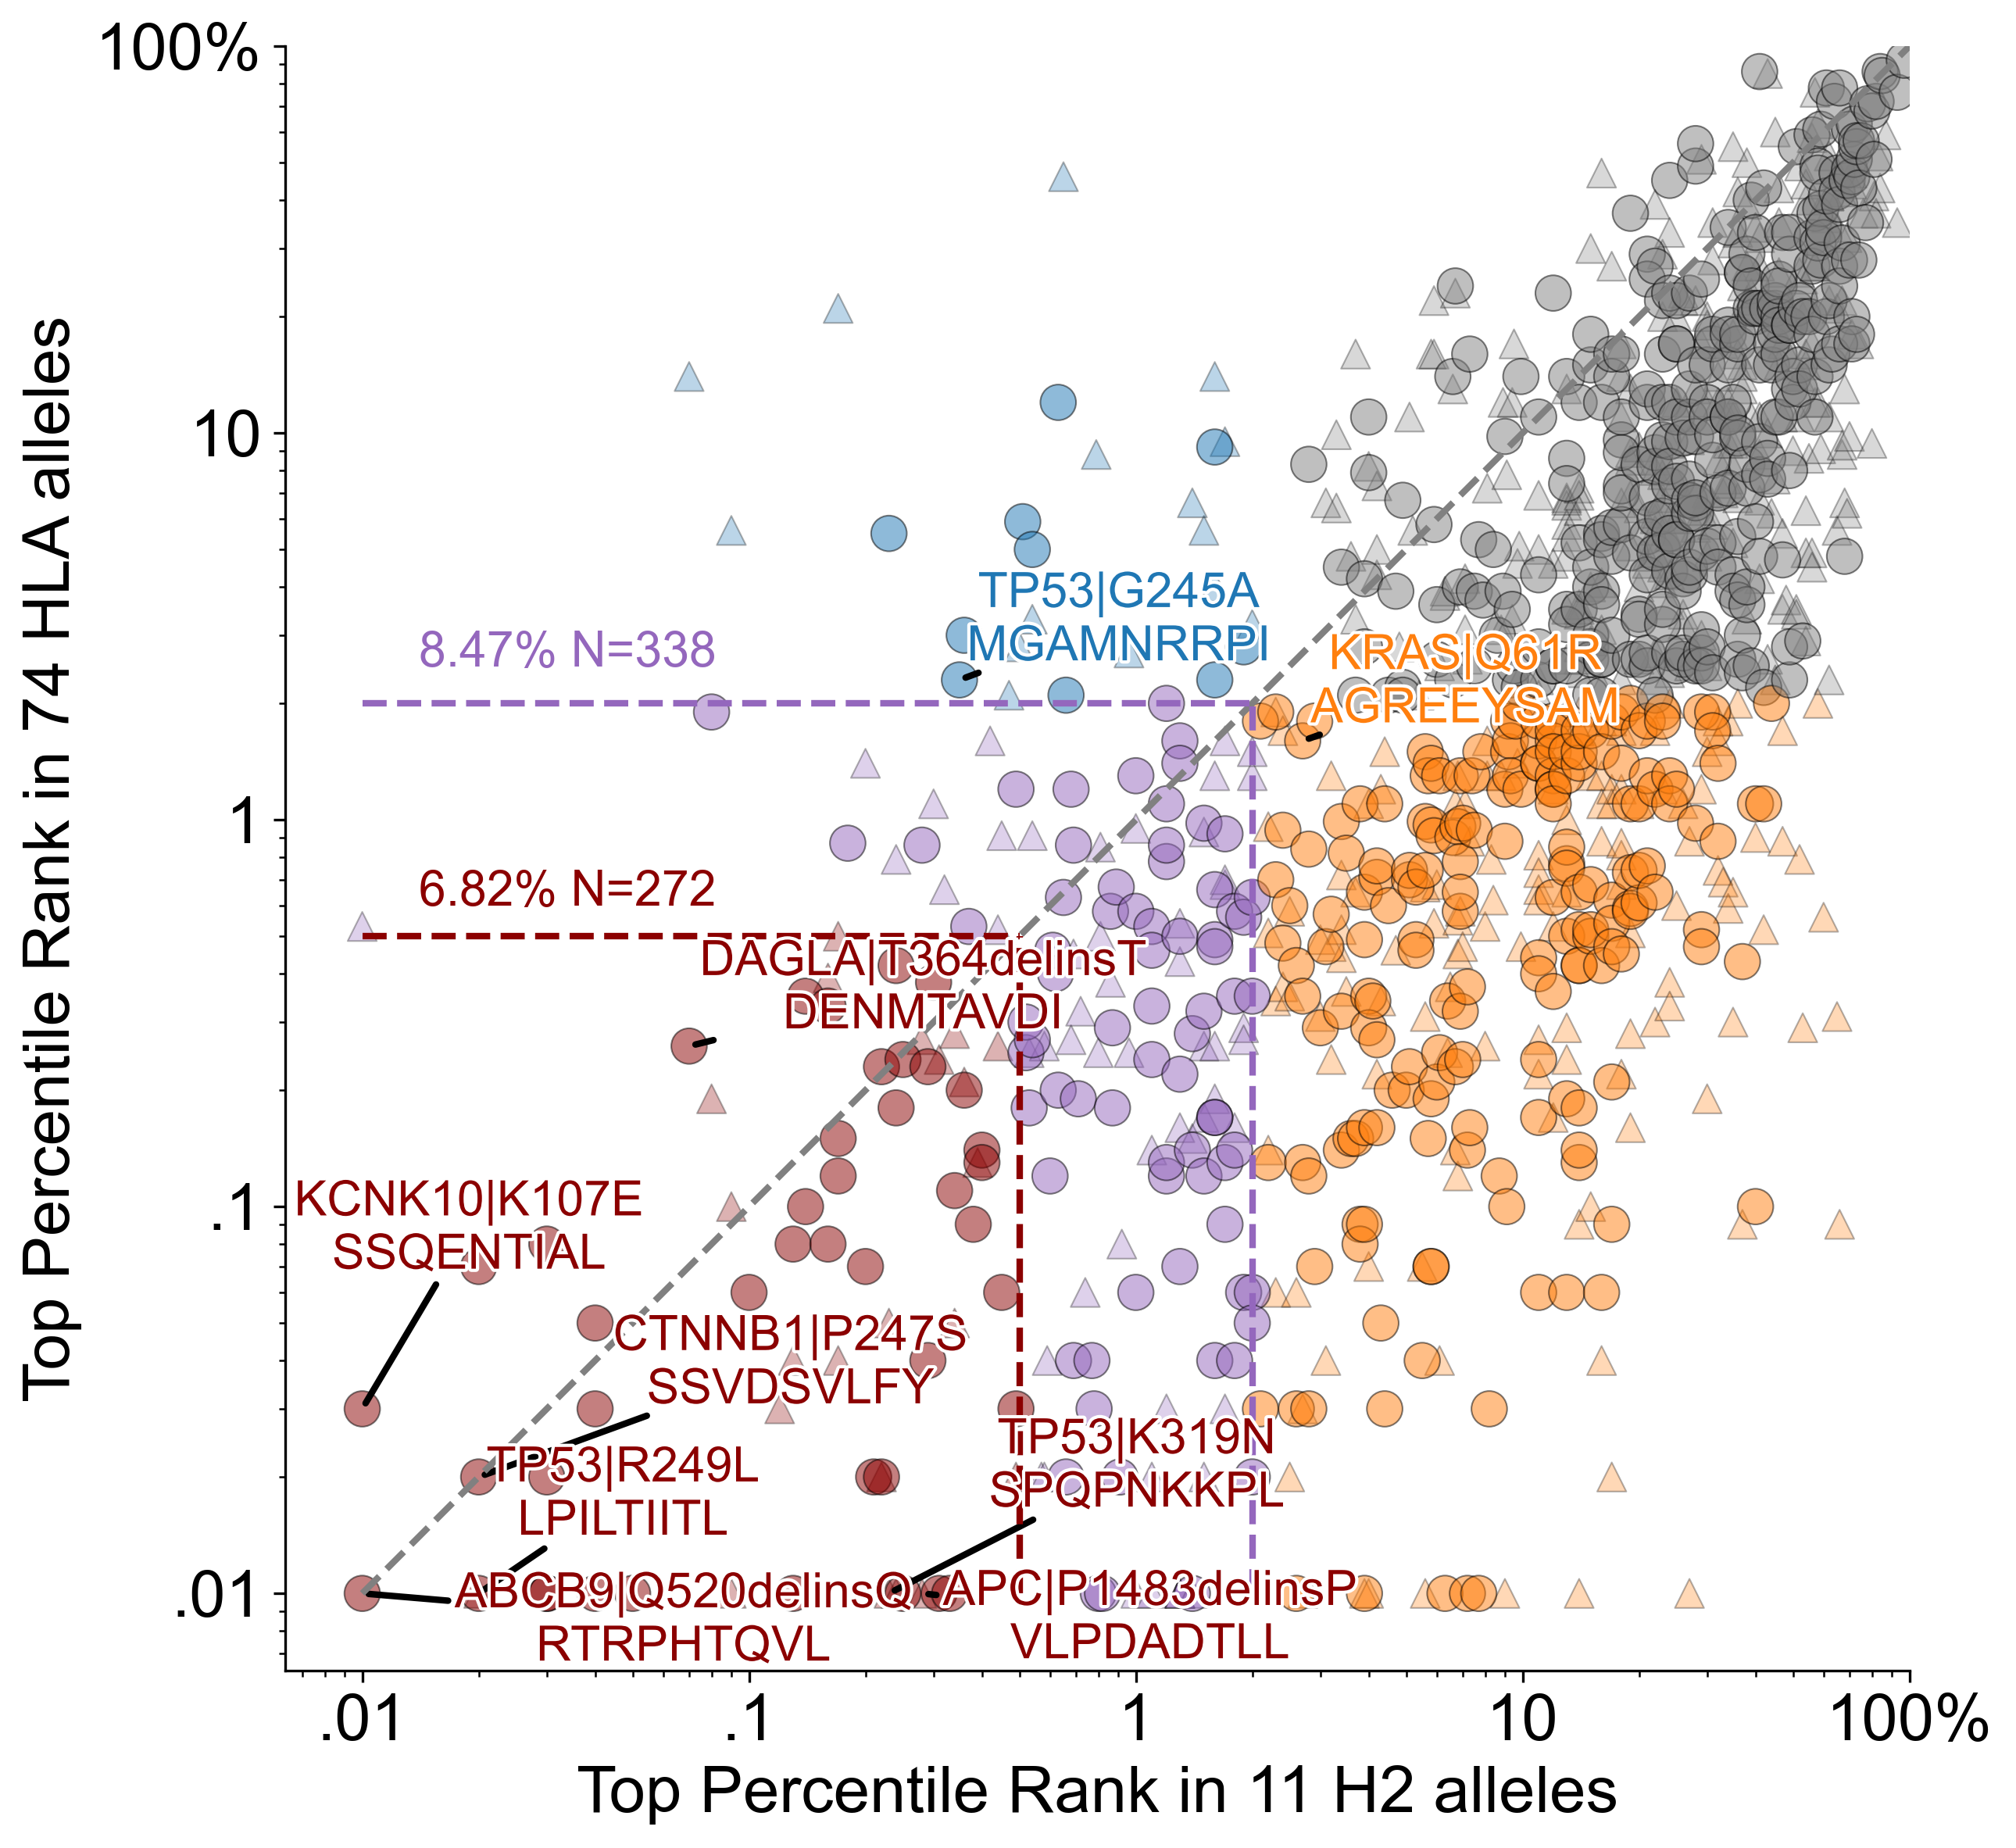

In [194]:
l_plot = l_final
bbb1 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_m'],l_plot['percentile_rank_h'])]].iloc[:3,:]
bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:3,:]
bbb3 = l_plot[l_plot['gene_name_h'].isin(['DAGLA','KRAS'])].iloc[:5,:]
bbb4 = l_plot[l_plot['gene_name_h'].isin(['TP53','EGFR','APC'])].iloc[:5,:]
bb2 = pd.concat([bbb1,bbb2,bbb3,bbb4]).drop_duplicates(subset=['gene_name_h','HGVSp_h'])

x = list(bb2['percentile_rank_m'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}' for x,y,p in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['human_9mers'])]
c = list(bb2['color'])


fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_m').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in 11 H2 alleles", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class']=='both') | (l_plot['class']=='strong')])
l_3 = len(l_plot[(l_plot['class']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
              #  bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3)
                )
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=15, color=cc[i])
         for i in range(len(xx))]


plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/neoantigen/best_m2h.pdf',bbox_inches='tight')
plt.show()

In [197]:
len(plot_1)

607

In [198]:
len(plot_2)

3384

## Supp Figure 4c 

In [206]:
l_final['class_kb'] = [dict_score_class(h,m) for h,m in zip(l_final['percentile_rank_h'], l_final['percentile_rank_kbdb'])]
l_final['color_kb'] = [dict_color_class[x] for x in l_final['class_kb']]

In [207]:
correlation, p_value = scipy.stats.spearmanr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Spearman correlation coefficient:", correlation)
print("P-value of the correlation:", p_value)
corr_p, p_value_p = scipy.stats.pearsonr(list(l_final['percentile_rank_kbdb']), list(l_final['percentile_rank_h']))
print("Pearson correlation coefficient:", corr_p)
print("P-value of the correlation:", p_value_p)

Spearman correlation coefficient: 0.5285967817208969
P-value of the correlation: 3.4023111345285956e-286
Pearson correlation coefficient: 0.4776734148621227
P-value of the correlation: 1.2072600784075773e-226


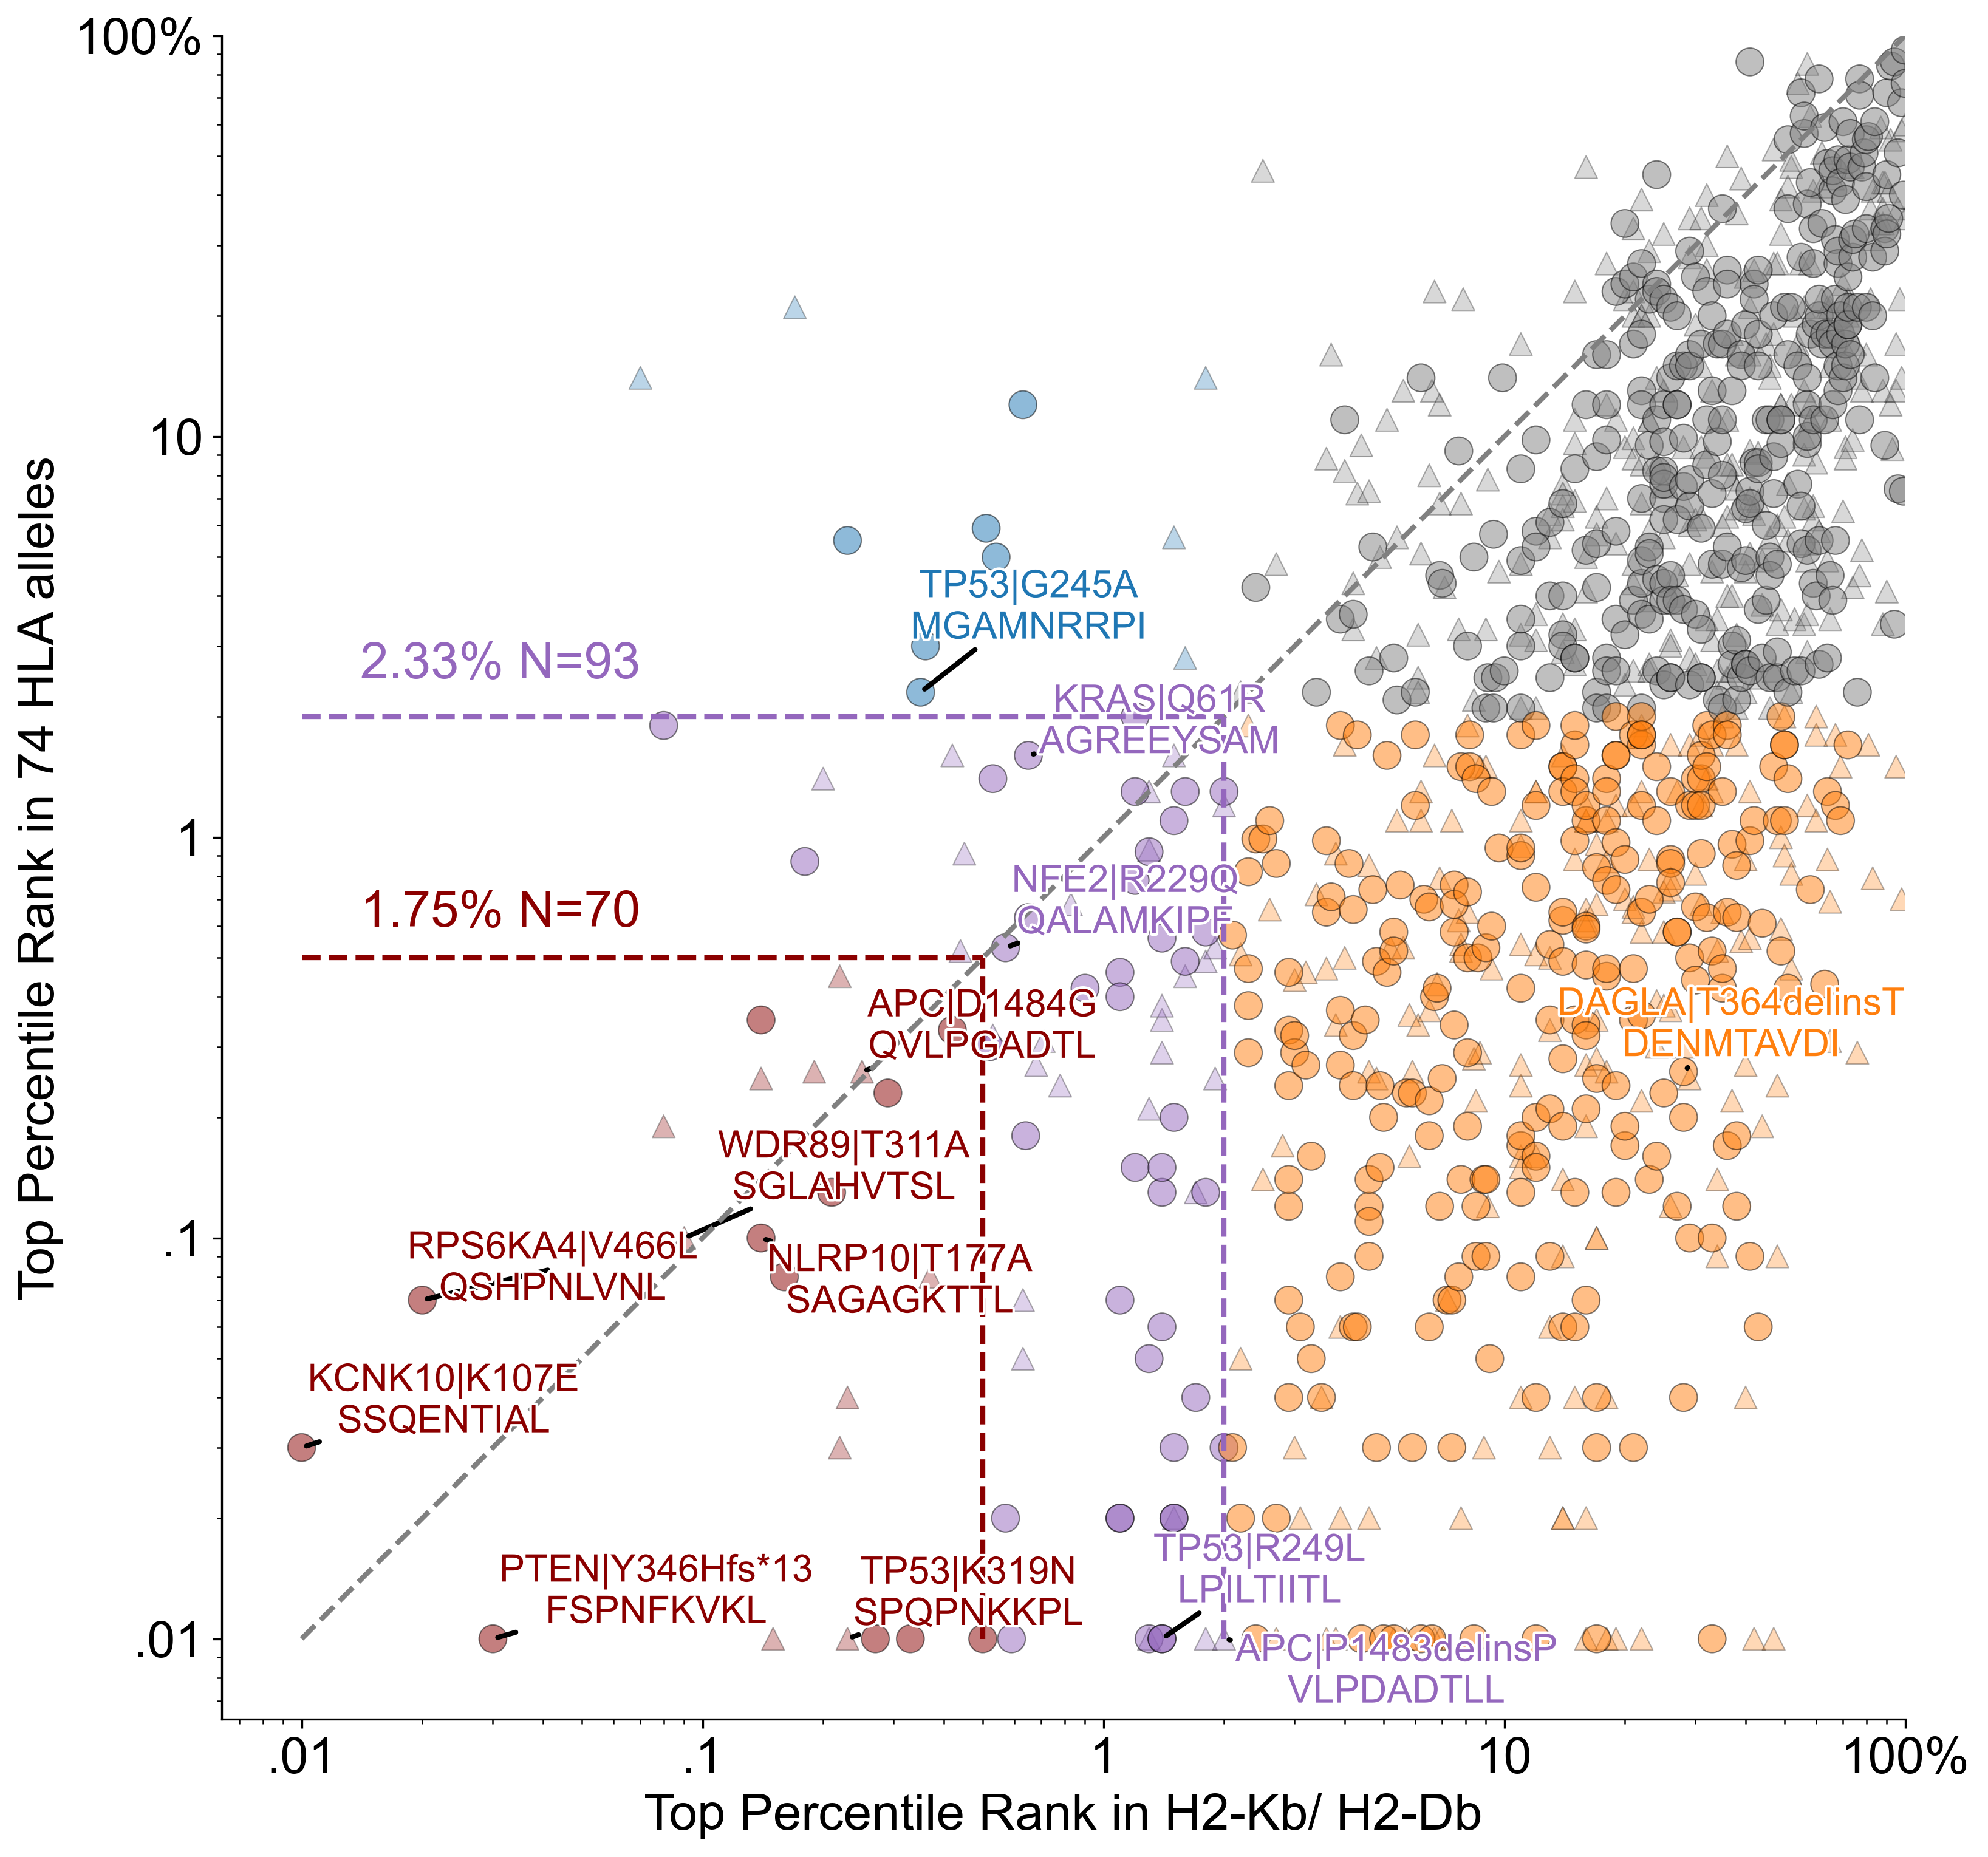

In [217]:
l_plot = l_final
bbb1 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_kbdb'],l_plot['percentile_rank_h'])]].iloc[:6,:]
bbb2 = l_plot[(l_plot['percentile_rank_h'] <= .01) & (l_plot['percentile_rank_m'] >= 85)].iloc[:4,:]
bbb3 = l_plot[l_plot['gene_name_h'].isin(['DAGLA','KRAS'])].iloc[:6,:]
bbb4 = l_plot[l_plot['gene_name_h'].isin(['TP53','EGFR','APC'])].iloc[:6,:]
bb2 = pd.concat([bbb1,bbb2,bbb3,bbb4]).drop_duplicates(subset=['gene_name_h','HGVSp_h'])

x = list(bb2['percentile_rank_kbdb'])
y = list(bb2['percentile_rank_h'])
t = [f'{x}|{y}\n{p}' for x,y,p in zip(bb2['gene_name_h'], bb2['HGVSp_h'], bb2['human_9mers'])]
c = list(bb2['color_kb'])


fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

plot_1 = l_plot[[x==y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]
plot_2 = l_plot[[x!=y for x,y in zip(l_plot['human_9mers'],l_plot['mouse_9mers'])]]

ax.scatter(data=plot_2.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.3, s=80, edgecolor='black', linewidths=.5, marker='^')
ax.scatter(data=plot_1.sort_values('percentile_rank_kbdb').drop_duplicates(subset='mouse_9mers'), x='percentile_rank_kbdb', y='percentile_rank_h', c = 'color_kb',alpha=.5, s=120, edgecolor='black', linewidths=.5)

plt.xscale('log')
plt.yscale('log')
ax.plot([.01, 100], [.01, 100], linewidth=2, linestyle='--', color='grey')
ax.plot([.01, .5], [.5, .5], linewidth=2, linestyle='--', color='darkred')
ax.plot( [.5, .5], [.01, .5],linewidth=2, linestyle='--', color='darkred')
ax.plot([.01, 2], [2, 2], linewidth=2, linestyle='--', color='tab:purple')
ax.plot([2, 2], [.01, 2],linewidth=2, linestyle='--', color='tab:purple')

ax.set_aspect('equal')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Top Percentile Rank in 74 HLA alleles", fontsize=20)
ax.set_xlabel("Top Percentile Rank in H2-Kb/ H2-Db", fontsize=20)

ticks = [0.01, 0.1, 1, 10, 100]
labels = ['.01', '.1', '1', '10', '100%']

ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_locator(FixedLocator(ticks))

ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: labels[pos]))

ax.tick_params(axis='both', labelsize=20)

# percentage label
l_1 = len(l_plot)
l_2 = len(l_plot[(l_plot['class_kb']=='both') | (l_plot['class_kb']=='strong')])
l_3 = len(l_plot[(l_plot['class_kb']=='both')])
per_1=l_2/l_1*100
per_2=l_3/l_1*100

tt = [f'{per_1:.2f}% N={l_2}', f'{per_2:.2f}% N={l_3}']
xx = [.014,.014]
yy = [2.5,.6]
cc = ['tab:purple', 'darkred']

# ax.set_title(f"{per_1:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = [ax.text(x[i], y[i], t[i], fontsize=15, color=c[i],
                 path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")],
              #  bbox=dict(facecolor='white', edgecolor=c[i], boxstyle='round,pad=0.3',alpha=.3)
                )
         for i in range(len(x))]

adjust_text(texts,only_move={'texts':'xy'}, ax=ax, 
            arrowprops=dict(arrowstyle="-", linewidth=2, alpha=1, color='black'))


texts_per = [ax.text(xx[i], yy[i], tt[i], fontsize=20, color=cc[i])
         for i in range(len(xx))]


plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/neoantigen/kb_m2h.pdf',bbox_inches='tight')
plt.show()

In [218]:
len(plot_1)

607

In [219]:
len(plot_2)

3384